# IMPORTING DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# READING THE DATASET

In [3]:
df=pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# DATA PROCESSING

In [16]:
# checking shape of data that how much rows and columns are in the dataset
df.shape

(301, 9)

In [6]:
# checking the values and data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Checking unique values in each column

In [10]:
df['Car_Name'].nunique()

98

In [12]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [14]:
df['Selling_type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [15]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

### Checking null values in dataset

In [18]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### value counts of each value in a column

In [20]:
print(df['Fuel_Type'].value_counts())
print(df['Selling_type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### Encoding the values

In [29]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Selling_type   301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


In [32]:
df['Selling_type'].unique()

array([0, 1], dtype=int64)

## plotting pairplot for each column in dataset

C:\Users\91985\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


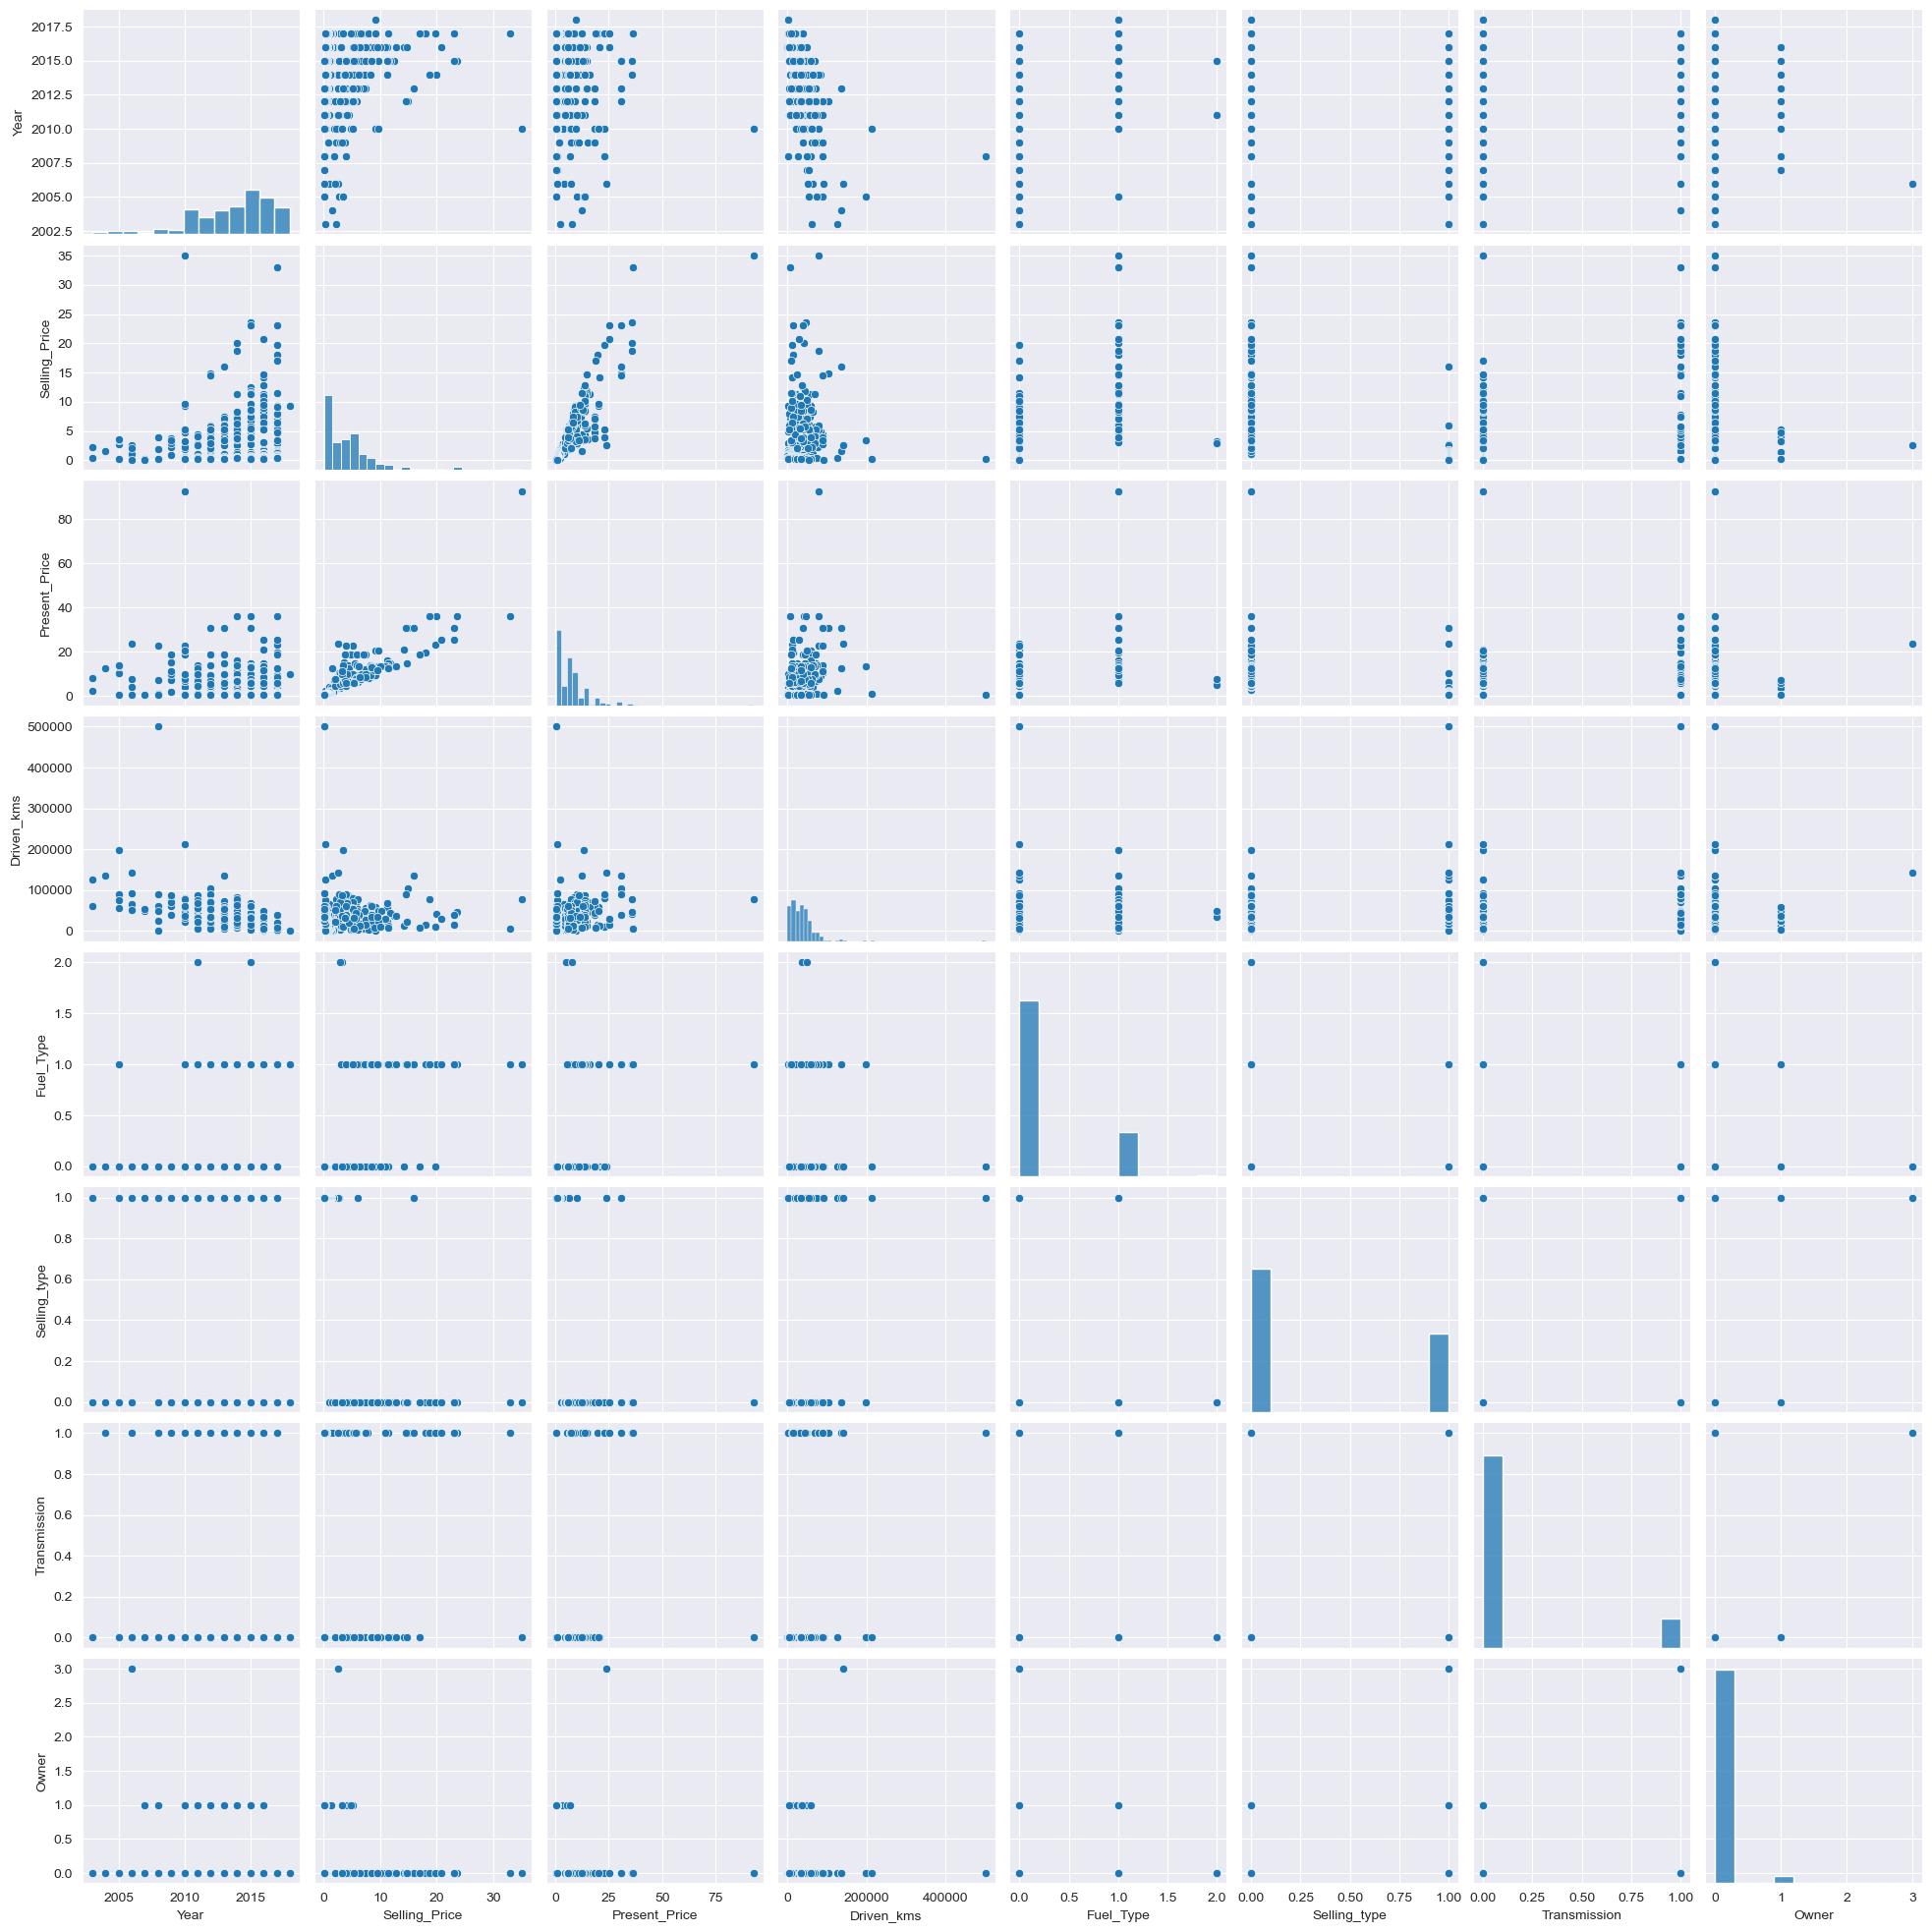

In [43]:
sns.set_style('darkgrid')
sns.pairplot(df)

## Scatterplot for checking correlation in selling and present price

<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

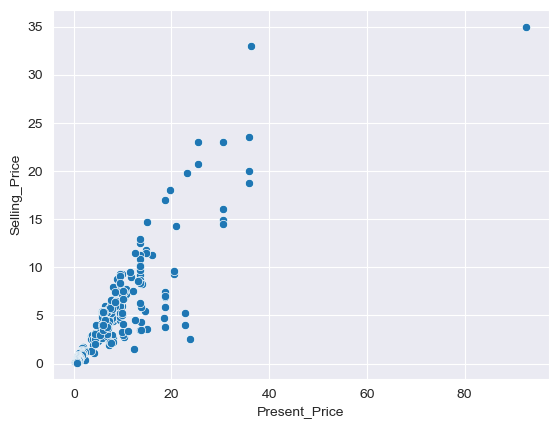

In [42]:
sns.set_style('darkgrid')
sns.scatterplot(x='Present_Price',y='Selling_Price',data=df)

## Splitting the data into training and testing data

In [45]:
from sklearn.model_selection import train_test_split

In [50]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=40)

In [95]:
X_train.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
187,2013,0.51,32000,0,1,0,0
288,2015,13.60,34000,0,0,0,0
113,2016,1.40,35000,0,1,0,0
203,2011,4.60,53460,0,0,0,0
209,2015,5.70,21125,1,0,0,0


## Model training

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr=LinearRegression()

In [98]:
lr.fit(X_train,y_train)

LinearRegression()

## Model evaluation

In [99]:
prediction=lr.predict(X_test)

Text(0.5, 1.0, 'Actual price vs Predicted price')

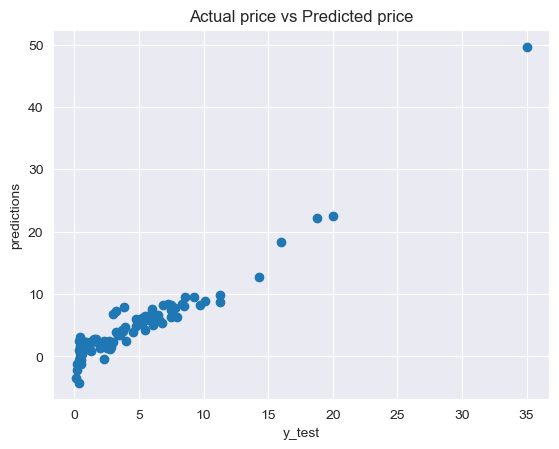

In [105]:
plt.scatter(y_test,prediction)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Actual price vs Predicted price')

In [101]:
from sklearn import metrics

In [102]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 1.3067327257614378
MSE: 4.661741625725978
RMSE: 2.1591066730770803
